### Importing modules

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Loading read summary tables

In [69]:
raw_df = pd.read_csv('../tables/raw_reads.csv')
deduped_df = pd.read_csv('../tables/deduped_reads.csv')
trimmed_df = pd.read_csv('../tables/trimmed_reads.csv')
aligned_df = pd.read_csv('../tables/aligned_reads.csv').drop(['aligned_reads'], axis=1)

### Merging dataframes

In [70]:
merged_df = raw_df.merge(deduped_df, on='Sample_ID').merge(trimmed_df, on = 'Sample_ID').merge(aligned_df, on='Sample_ID')
merged_df

,Sample_ID,raw_reads,deduped_count,trimmed_count,aligned_0_times,aligned_exactly_once,aligned_more_than_once,overall_alignment_rate
0,ucin309,2082515,476417,476417,9524,398992,67901,0.98
1,ucin301,2569876,538111,538111,10628,448413,79070,0.98
2,ucin321,5319394,1074453,1074452,31950,887148,155354,0.97
3,ucin330,999515,262282,262281,4355,217779,40147,0.98
4,ucin379,7168214,1029049,1029046,21065,870022,137959,0.98
...,...,...,...,...,...,...,...,...
334,ucin342re,48112,19209,19209,696,14516,3997,0.96
335,ucin261replicate,351430,122158,122158,4719,97496,19943,0.96
336,ucin415,192841,73655,73655,29657,35021,8977,0.60
337,ucin349conc,306160,99372,99372,1075,80373,17924,0.99


### Basic statistics

In [80]:
def custom_format(x):
    if x == int(x) or x > 1:
        return f'{int(round(x))}'
    else:
        return f'{x:.2f}'
summary_table = pd.DataFrame({'Mean': merged_df.iloc[:,1:].mean().round(2),
                            'Std': merged_df.iloc[:,1:].std().round(2),
                            'Min': merged_df.iloc[:,1:].min().round(2),
                            'Max': merged_df.iloc[:,1:].max().round(2)})
summary_table.applymap(custom_format)

,Mean,Std,Min,Max
raw_reads,3391474,3729202,19332,38977913
deduped_count,629307,398066,8521,2738388
trimmed_count,629307,398066,8521,2738388
aligned_0_times,103242,246762,577,2357815
aligned_exactly_once,450880,260587,5696,1192974
aligned_more_than_once,75184,40147,1943,208646
overall_alignment_rate,0.87,0.19,0.02,0.99


### Histograms

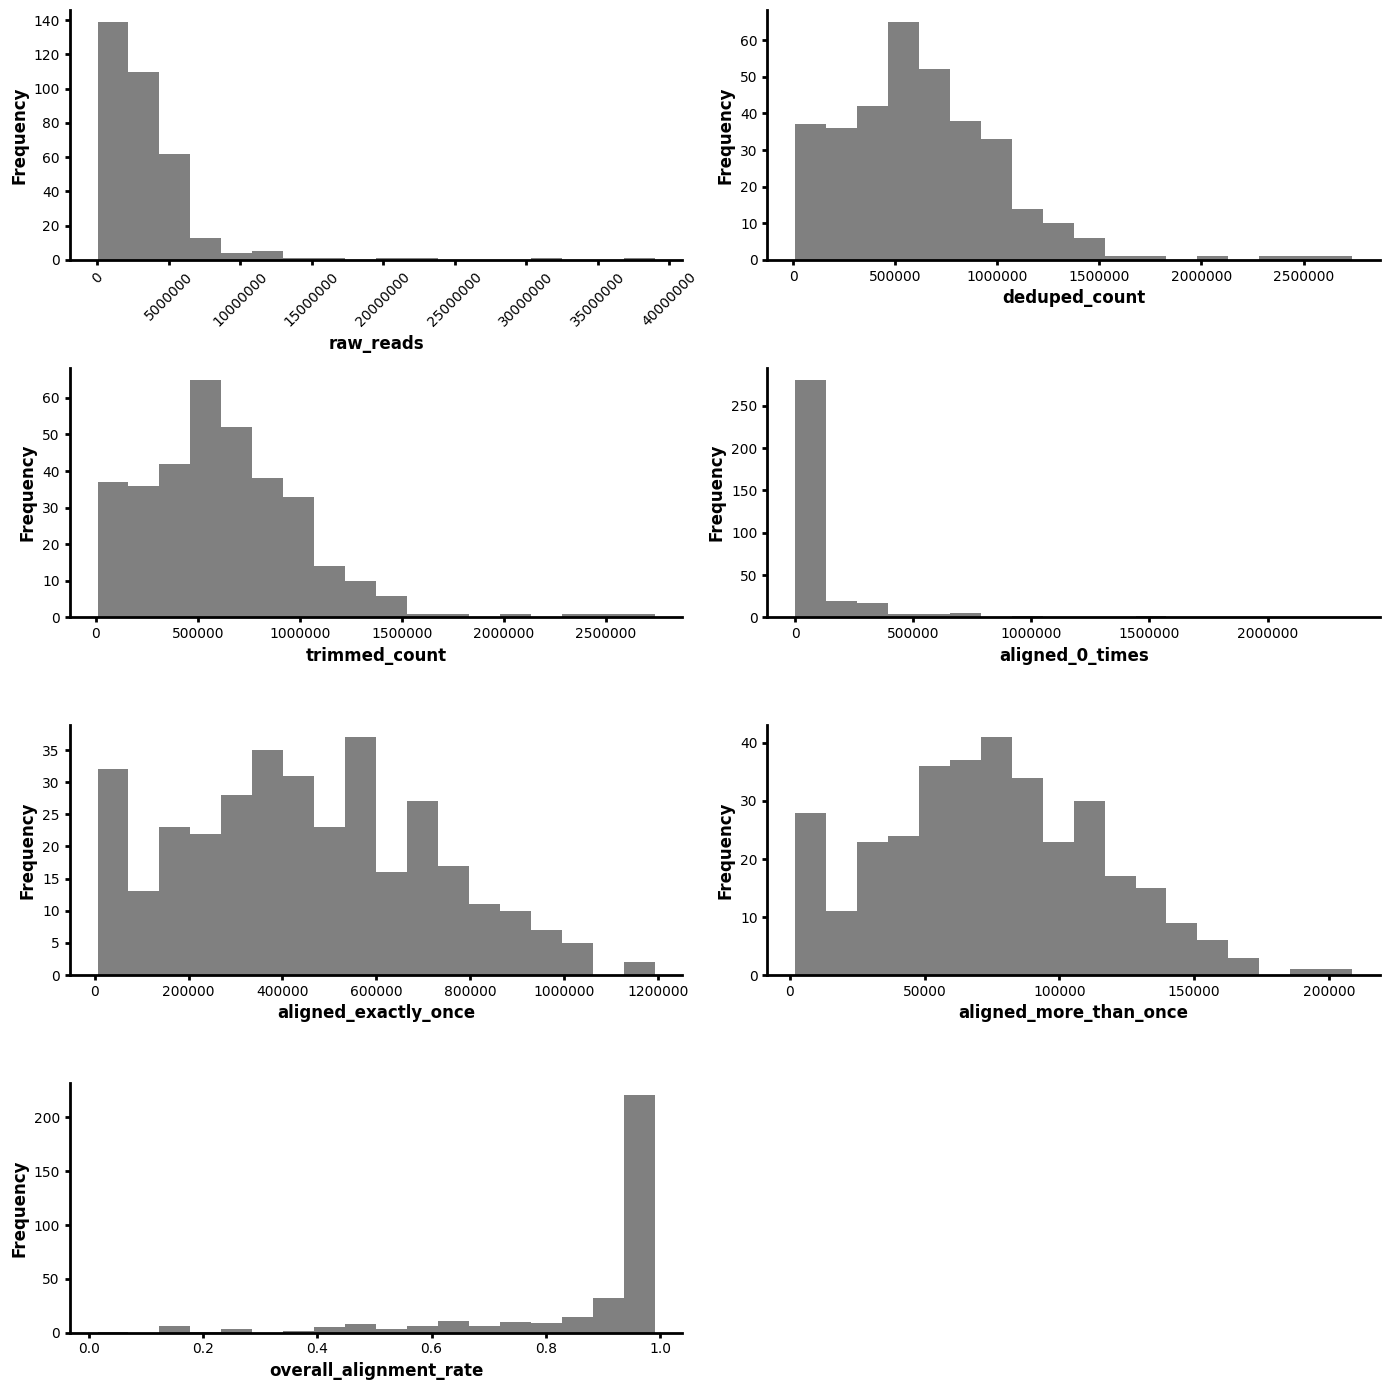

In [101]:
formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)

plt.figure(figsize=(14,14))
for idx, col_name in enumerate(merged_df.iloc[:,1:].columns):
    col = merged_df[col_name]
    
    ax = plt.subplot(4,2,idx+1)
    
    ax.hist(col, color = 'gray', bins = 18 )
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.tick_params(axis='both', width=2)
    ax.set_xlabel(col_name, fontname='Arial', fontweight='bold', fontsize=12)
    ax.set_ylabel('Frequency', fontname='Arial', fontweight='bold', fontsize=12)
    plt.gca().xaxis.set_major_formatter(formatter)
    if col_name == 'raw_reads':
        plt.xticks(rotation=45)
        
plt.tight_layout()
plt.show()